In [2]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)

In [3]:
# Récupération et lecture du fichier xlsx
df_test = pd.ExcelFile('./data/crimes_mensuels.xlsx')
sheet_names = df_test.sheet_names

In [4]:
# récupération des données de chaque département
dict_df = pd.read_excel('./data/crimes_mensuels.xlsx', sheet_name=sheet_names[2:109])

In [5]:
dict_df

{'01':      Index                                      libellé index  _2022_07  \
 0        1             Règlements de compte entre malfaiteurs         0   
 1        2       Homicides pour voler et à l'occasion de vols         0   
 2        3                     Homicides pour d'autres motifs         3   
 3        4  Tentatives d'homicides pour voler et à l'occas...         1   
 4        5          Tentatives homicides pour d'autres motifs         4   
 ..     ...                                                ...       ...   
 102    103  Infractions à l'exercice d'une profession règl...         8   
 103    104  Infractions au droit de l'urbanisme et de la c...         6   
 104    105                                   Fraudes fiscales         0   
 105    106            Autres délits économiques et financiers         0   
 106    107                                      Autres délits       144   
 
      _2022_06  _2022_05  _2022_04  _2022_03  _2022_02  _2022_01  _2021_12  \
 0

In [6]:
# récupération des données de chaque département
dict_sum_df = {}
dict_sum_total_dep = {}
for key, value in dict_df.items():
    dict_sum_df[key] = []
    current_df = dict_df[key].loc[:,"_2021_12": "_2015_01"]
    dict_sum_df[key] =  current_df.sum()[::-1]
    dict_sum_total_dep[key] = dict_sum_df[key].sum()    
# dict_sum_df["01"].sum()

# dictionnaire des données de chaque département ordonnées par le nombre de crimes
dict_sum_total_dep = {k: v for k, v in sorted(dict_sum_total_dep.items(), key=lambda item: item[1], reverse=True)}
dict_sum_total_dep

{'75': 1930540,
 '59': 1109240,
 '13': 1079838,
 '93': 999478,
 '69': 952045,
 '92': 774998,
 '33': 653619,
 '94': 644606,
 '31': 630166,
 '44': 583015,
 '95': 568022,
 '77': 564650,
 '78': 559103,
 '34': 524735,
 '38': 516607,
 '06': 512554,
 '62': 500900,
 '91': 486958,
 '83': 443827,
 '76': 434460,
 '67': 340230,
 '35': 299426,
 '57': 298927,
 '60': 287948,
 '30': 269652,
 '74': 263013,
 '42': 259406,
 '29': 253285,
 '54': 241919,
 '45': 226453,
 '974': 224395,
 '84': 219228,
 '17': 217609,
 '49': 216689,
 '68': 215866,
 '51': 211996,
 '66': 204153,
 '14': 202169,
 '63': 199534,
 '37': 196301,
 '56': 195401,
 '26': 189511,
 '80': 187616,
 '64': 184273,
 '01': 183443,
 '25': 179536,
 '72': 176920,
 '27': 172220,
 '02': 170784,
 '971': 166996,
 '85': 160880,
 '21': 160581,
 '22': 148216,
 '73': 145873,
 '71': 141416,
 '973': 137445,
 '86': 130166,
 '972': 127770,
 '11': 126963,
 '988': 126444,
 '89': 121827,
 '28': 119751,
 '40': 114492,
 '10': 113801,
 '16': 108925,
 '50': 107060,
 '

In [7]:
# récuperer les tops premiers départements de crimes
top = 5
dict_top = dict(list(dict_sum_total_dep.items())[0:top])
dict_other = sum(dict(list(dict_sum_total_dep.items())[top:]).values())
dict_top['Autres départements'] = dict_other


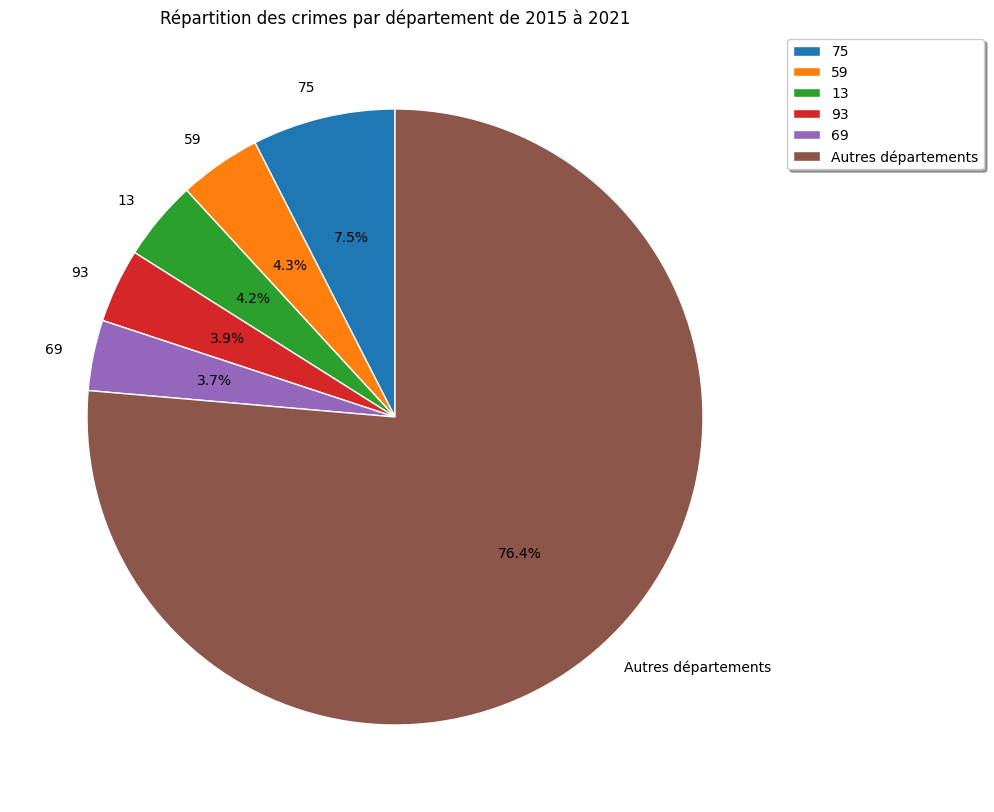

In [8]:
# create data: an array of values

# Create a pieplot
plt.pie(dict_top.values(), labels=dict_top.keys(), autopct='%1.1f%%', startangle=90,wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1)
plt.title("Répartition des crimes par département de 2015 à 2021")
plt.show()

In [9]:
# Création d'un dictionnaire des départements par région
dict_region = {"auvergne_rhone_alpes" : ['01', '03', '07', '15', '26', '38', '42', '43', '63','69', '73', '74'],
"bourgogne_franche_comte" : ['21', '25', '39', '58', '70', '71', '89', '90'],
"bretagne" : ['22', '29', '35', '56'],
"centre_val_de_loire" : ['18', '28', '36', '37', '41', '45'],
"corse" : ['2B', '2A'],
"grand_est" : ['08', '10', '51', '52', '54', '55', '57', '88'],
"hauts_de_france" : ['02', '59', '60', '62', '80'],
"ile_de_france" : ['75', '77', '78', '91', '92', '93', '94', '95'],
"normandie" : ['14', '27', '50', '61', '76'],
"nouvelle_aquitaine" : ['16', '17', '19', '23', '24', '33', '40', '47', '64', '79', '86', '87'],
"occitanie" : ['09', '11', '12', '30', '31', '32', '34', '46', '48', '65', '66', '81', '82'],
"pays_de_la_loire" : ['44', '49', '53', '72', '85'],
"provence_alpes_cote_azur" : ['04', '05', '06', '13', '83', '84'],
"dom_tom": ['971', '972', '973', '974', '975', '976', '977', '978', '986', '987', '988']
}

In [10]:
# Récupération des données de crimes par région pour les années 2015 à 2021
dict_sum_total_region = {}
for key, value in dict_region.items():
    dict_sum_total_region[key] = 0
    for dep in value:
        dict_sum_total_region[key] += dict_sum_total_dep[dep]
# dict_region
dict_sum_total_region


{'auvergne_rhone_alpes': 2972121,
 'bourgogne_franche_comte': 830674,
 'bretagne': 896328,
 'centre_val_de_loire': 782780,
 'corse': 99234,
 'grand_est': 1151859,
 'hauts_de_france': 2256488,
 'ile_de_france': 6528355,
 'normandie': 993172,
 'nouvelle_aquitaine': 1881528,
 'occitanie': 2210392,
 'pays_de_la_loire': 1209265,
 'provence_alpes_cote_azur': 2358570,
 'dom_tom': 964204}

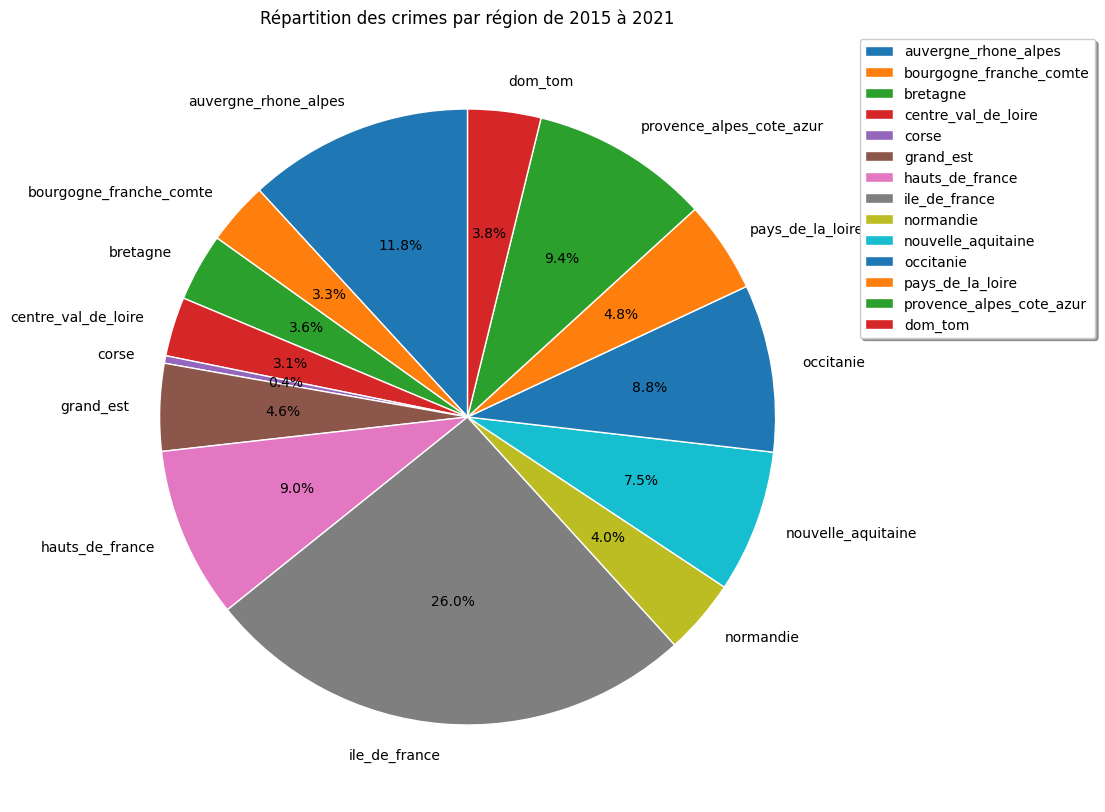

In [11]:
# Création de graphique en camembert par région
plt.pie(dict_sum_total_region.values(), labels=dict_sum_total_region.keys(), autopct='%1.1f%%', startangle=90,wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1)
plt.title("Répartition des crimes par région de 2015 à 2021")
plt.show()